In [1]:
import pandas as pd
import numpy as np
import csv as csv
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as p
%matplotlib inline

In [2]:
# Data cleanup
# TRAIN DATA
train_df = pd.read_csv('train.csv', header=0)        # Load the train file into a dataframe
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
# I need to convert all strings to integer classifiers.
# I need to fill in the missing values of the data and make it complete.

# female = 0, Male = 1
train_df['Gender'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Embarked from 'C', 'Q', 'S'
# Note this is not ideal: in translating categories to numbers, Port "2" is not 2 times greater than Port "1", etc.

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [4]:
# All missing Embarked -> just make them embark from most common place
if len(train_df.Embarked[ train_df.Embarked.isnull() ]) > 0:
    train_df.Embarked[ train_df.Embarked.isnull() ] = train_df.Embarked.dropna().mode().values

Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
train_df.Embarked = train_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int

print Ports_dict
train_df.head()

{'Q': 1, 'C': 0, 'S': 2}


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,2,1


In [5]:
# All the ages with no data -> make the median of all Ages
median_age = train_df['Age'].dropna().median()
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = median_age

# Remove the Name column, Cabin, Ticket, and Sex (since I copied and filled it to Gender)
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22,1,0,7.2500,2,1
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,2,0
3,1,1,35,1,0,53.1000,2,0
4,0,3,35,0,0,8.0500,2,1


In [6]:
# TEST DATA
test_df = pd.read_csv('test.csv', header=0)        # Load the test file into a dataframe

# I need to do the same with the test data now, so that the columns are the same as the training data
# I need to convert all strings to integer classifiers:
# female = 0, Male = 1 by mapping
test_df['Gender'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Embarked from 'C', 'Q', 'S'
# All missing Embarked -> just make them embark from most common place
if len(test_df.Embarked[ test_df.Embarked.isnull() ]) > 0:
    test_df.Embarked[ test_df.Embarked.isnull() ] = test_df.Embarked.dropna().mode().values
# Again convert all Embarked strings to int
test_df.Embarked = test_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)

# All the ages with no data -> make the median of all Ages
median_age = test_df['Age'].dropna().median()
if len(test_df.Age[ test_df.Age.isnull() ]) > 0:
    test_df.loc[ (test_df.Age.isnull()), 'Age'] = median_age

# All the missing Fares -> assume median of their respective class
if len(test_df.Fare[ test_df.Fare.isnull() ]) > 0:
    median_fare = np.zeros(3)
    for f in range(0,3):                                              # loop 0 to 2
        median_fare[f] = test_df[ test_df.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):                                              # loop 0 to 2
        test_df.loc[ (test_df.Fare.isnull()) & (test_df.Pclass == f+1 ), 'Fare'] = median_fare[f]

In [12]:
#dfmi.loc[:,('one','second')]
train_df_plotting = train_df[['Survived','Age','Fare']]
train_df_plotting;

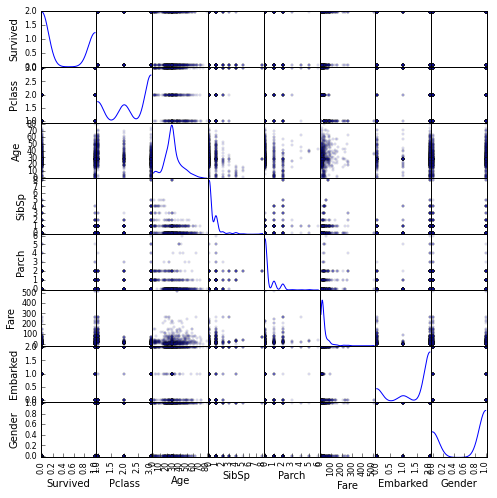

In [43]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train_df, alpha=0.1, figsize=(8,8), diagonal='kde');

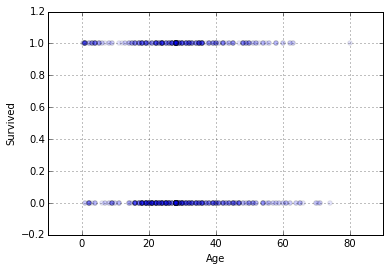

In [42]:
train_df.plot(x='Age',y='Survived',kind='scatter',alpha=.1)

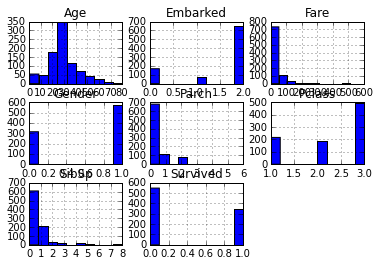

In [20]:
train_df.hist();

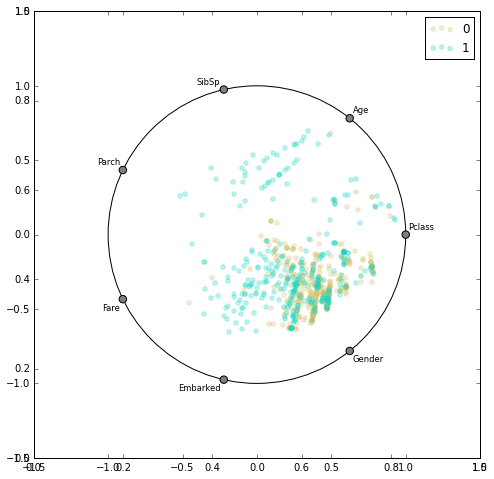

In [75]:
from pandas.tools.plotting import radviz
fig, axes = p.subplots(nrows = 1, ncols = 1, figsize = (8, 8))
radviz(train_df, 'Survived',alpha = .3)

In [139]:
from sklearn.decomposition import PCA
X = train_df.drop('Survived',1);
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print X_r

[[-25.15178555   6.69330567]
 [ 39.31601923  -7.58358608]
 [-24.37015037   2.69727015]
 ..., 
 [ -8.78704894   1.16739726]
 [ -2.2807319    3.25782305]
 [-24.38021757  -3.30582596]]


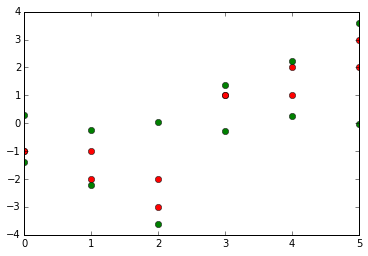

In [140]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
p.plot(X,'ro')
p.plot(X_r,'go')

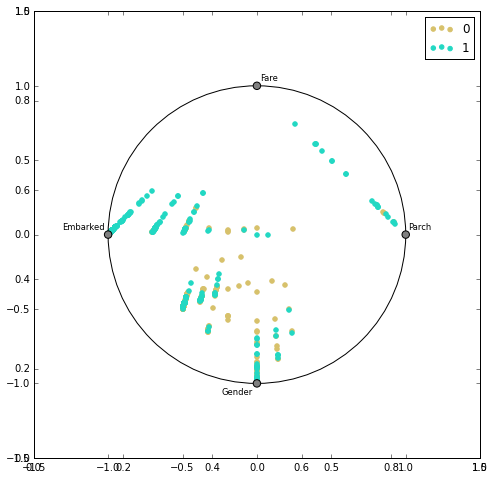

In [101]:
train_df_dropGender = train_df.drop(train_df.columns[range(1,4)],axis=1) # Note: zero indexed
fig, axes = p.subplots(nrows = 1, ncols = 1, figsize = (8,8))
radviz(train_df_dropGender, 'Survived')

In [9]:
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22,1,0,7.2500,2,1
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,2,0
3,1,1,35,1,0,53.1000,2,0
4,0,3,35,0,0,8.0500,2,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,0


In [141]:
print 'Training...'
forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
forest.fit( train_data[0:,1:], train_data[0:,0] ) # X starts at 2nd column, y is 1st column

print 'Predicting...'
output = forest.predict(test_data).astype(int)
print forest.oob_score_

predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'

Training...


NameError: name 'train_data' is not defined

In [ ]:
zip(ids, output)

In [ ]:
print train_data[0:,1:].shape
print train_data[0:,0].shape
print test_data.shape
print output.shape

In [ ]:
a = np.arange(10)

print a
print a[:1]
print a[1:]